In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative
import scipy.optimize as op
import math
#Code for Anlysing slotted link mechansim

In [2]:
slotted_link_data = pd.read_csv(".\\Slotted_Link.csv")
slotted_link_data

,Angle,Displacement,Velocity,Acceleration
0,0,0.0,0.0,2.3
1,30,0.3,1.1,2.0
2,60,1.1,1.9,1.2
3,90,2.3,2.3,0.0
4,120,3.6,2.0,-1.1
5,150,4.1,1.2,-2.0
6,180,4.9,0.0,-2.4
7,210,4.2,-1.2,-2.0
8,240,3.6,-1.9,-1.2
9,270,2.4,-2.3,0.0


In [3]:
x_values = np.array(slotted_link_data["Angle"])
y_values = np.array(slotted_link_data["Displacement"])

# Theoretical Curve: $a(1-cos(\theta))$

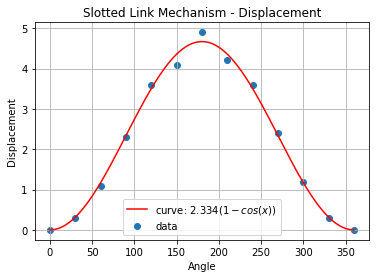

In [4]:
#Theoretical Curve (a>0)
curve = lambda x,a : (1 - np.cos(np.radians(x)))*a

#Non Linear Least Square cuve fitting using the trust riegion reflective algorithm(trf)
parameters, conv = op.curve_fit(curve,
                                x_values,y_values,
                                method = 'trf',
                                bounds=(0,np.inf) #(lower bound a upper bound a)
                               )

fitted_curve = lambda x : curve(x,*parameters)
########## Drawing the fitted Graph ###############
plt.scatter(x_values,y_values,label=f"data") #Plotting the data points

#PLotting the curve
x_data = np.linspace(0,360,1000)
y_data = fitted_curve(x_data)
plt.plot(x_data,y_data,'r',label=f"curve: ${parameters[0]:0.3f}(1-cos(x))$")

plt.title("Slotted Link Mechanism - Displacement")
plt.xlabel("Angle")
plt.ylabel("Displacement")
plt.legend()
plt.grid()
plt.savefig("Slotted Link Mechanism_Displacement.png")
plt.show()
###################################################

In [5]:
Displacement_error = pd.DataFrame.from_dict({"Angle":slotted_link_data["Angle"],"Experimental":slotted_link_data["Displacement"],"Theoretical":np.array([fitted_curve(x) for x in x_values])})
Displacement_error["Error"] = np.abs(Displacement_error["Experimental"]-Displacement_error["Theoretical"])
Displacement_error                                            

,Angle,Experimental,Theoretical,Error
0,0,0.0,0.000000,0.000000
1,30,0.3,0.312744,0.012744
2,60,1.1,1.167178,0.067178
3,90,2.3,2.334355,0.034355
4,120,3.6,3.501533,0.098467
5,150,4.1,4.355966,0.255966
6,180,4.9,4.668711,0.231289
7,210,4.2,4.355966,0.155966
8,240,3.6,3.501533,0.098467
9,270,2.4,2.334355,0.065645


In [6]:
#Finding the theoretical Derivateves at the data points
velocity_data = [derivative(fitted_curve,x,dx=1e-5,n = 1)*np.degrees(1) for x in x_values]
slotted_link_velocity = pd.DataFrame.from_dict({"Angle":x_values,"Experimental":slotted_link_data["Velocity"],"Theoretical":velocity_data})
slotted_link_velocity["Error"] = np.abs(slotted_link_velocity["Experimental"]-slotted_link_velocity["Theoretical"])
slotted_link_velocity

,Angle,Experimental,Theoretical,Error
0,0,0.0,0.000000,0.000000
1,30,1.1,1.167178,0.067178
2,60,1.9,2.021611,0.121611
3,90,2.3,2.334355,0.034355
4,120,2.0,2.021611,0.021611
5,150,1.2,1.167178,0.032822
6,180,0.0,0.000000,0.000000
7,210,-1.2,-1.167178,0.032822
8,240,-1.9,-2.021611,0.121611
9,270,-2.3,-2.334355,0.034355


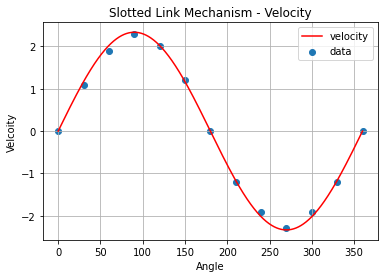

In [7]:
plt.scatter(x_values,slotted_link_data["Velocity"],label=f"data") #Plotting the data points

#PLotting the curve
x_data = np.linspace(0,360,1000)
y_data = np.array([derivative(fitted_curve,x,dx=1e-6,n = 1)*np.degrees(1) for x in x_data])
plt.plot(x_data,y_data,'r',label=f"velocity")

plt.title("Slotted Link Mechanism - Velocity")
plt.xlabel("Angle")
plt.ylabel("Velcoity")
plt.legend()
plt.grid()
plt.savefig("Slotted Link Mechanism_Velocity.png")
plt.show()

In [8]:
#Accelereation
#Finding the theoretical Derivateves at the data points
acceleration_data = [derivative(fitted_curve,x,dx=1e-4,n = 2)*np.degrees(1)*np.degrees(1) for x in x_values]
slotted_link_acceleration = pd.DataFrame.from_dict({"Angle":x_values,"Experimental":slotted_link_data["Acceleration"],"Theoretical":acceleration_data})
slotted_link_acceleration["Error"] = np.abs(slotted_link_acceleration["Experimental"]-slotted_link_acceleration["Theoretical"])
slotted_link_acceleration

,Angle,Experimental,Theoretical,Error
0,0,2.3,2.334398,0.034398
1,30,2.0,2.021740,0.021740
2,60,1.2,1.167308,0.032692
3,90,0.0,0.000292,0.000292
4,120,-1.1,-1.166870,0.066870
5,150,-2.0,-2.021759,0.021759
6,180,-2.4,-2.334324,0.065676
7,210,-2.0,-2.021759,0.021759
8,240,-1.2,-1.167745,0.032255
9,270,0.0,0.000146,0.000146


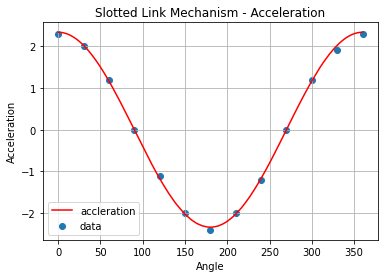

In [9]:
plt.scatter(x_values,slotted_link_data["Acceleration"],label=f"data") #Plotting the data points

#PLotting the curve
x_data = np.linspace(0,360,1000)
y_data = np.array([derivative(fitted_curve,x,dx=1e-4,n = 2)*np.degrees(1)*np.degrees(1) for x in x_data])
plt.plot(x_data,y_data,'r',label=f"accleration")
plt.title("Slotted Link Mechanism - Acceleration")
plt.xlabel("Angle")
plt.ylabel("Acceleration")
plt.legend()
plt.grid()
plt.savefig("Slotted Link Mechanism_Acceleration.png")
plt.show()